<a href="https://colab.research.google.com/github/Jamsiyakhadar/Capstone-Project--Entri/blob/main/Machine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

## **Predictive Maintenance for Industrial Machinery**

###               Jamsiya Khadar ,Entri Software Pvt ltd ,12-05-2024




**Introduction**

In industrial settings, the maintenance of machinery plays a crucial role in ensuring uninterrupted operations and minimizing downtime. However, traditional maintenance approaches often rely on reactive strategies, where maintenance is performed after equipment failure occurs. This can lead to costly downtime, inefficient resource allocation, and reduced productivity. To address these challenges, proactive maintenance strategies are essential, leveraging predictive maintenance techniques enabled by machine learning algorithms.

**Problem Statement**

The problem at hand involves developing a predictive maintenance model for industrial machinery. This model aims to forecast potential equipment failures based on historical sensor data, environmental conditions, and maintenance records. By analyzing patterns in the data, the model will predict when maintenance interventions are needed before failures occur, thereby minimizing downtime and optimizing resource allocation.

**Cause of the Problem**

The current reliance on reactive maintenance practices is not only costly but also leads to unexpected downtime, production delays, and increased risk of equipment damage. Additionally, the increasing complexity of industrial machinery and the growing volume of sensor data make it challenging for maintenance teams to identify potential issues before they escalate into failures.

**Relevance**

Predictive maintenance offers significant advantages over traditional approaches by enabling proactive intervention, reducing maintenance costs, and maximizing equipment uptime. By leveraging machine learning techniques to analyze historical data, manufacturing plants can transition from reactive to proactive maintenance practices, leading to improved operational efficiency, reduced downtime, and enhanced productivity.

**Objective**

The objective of this project is to develop a robust predictive maintenance model using machine learning algorithms. This model will analyze historical sensor data, environmental conditions, and maintenance records to predict equipment failures before they occur. By minimizing downtime, optimizing resource allocation, and reducing maintenance costs, the model aims to improve operational efficiency and maximize equipment uptime in industrial machinery operations.


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/predictive_maintenance_data.csv")

# Check the first few rows
print("First 5 rows:\n", data.head())

# Check the column headings
print("\nColumn Headings:\n", data.columns)

# Check the size of the dataset (rows, columns)
print("\nDataset Size:", data.shape)

# Check summary statistics
print("\nSummary Statistics:\n", data.describe())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicate records
print("\nDuplicate Records:\n", data.duplicated().sum())


First 5 rows:
    Equipment_ID  Sensor_1  Sensor_2  Sensor_3  Environmental_Temperature  \
0           766     26.80     27.88     0.009                       21.4   
1           964     23.99     26.31     0.006                       21.9   
2            45     24.17     26.93     0.003                       22.2   
3            53     27.66     20.30     0.010                       24.6   
4           797     23.30     27.03     0.007                       24.2   

   Environmental_Humidity  Production_Volume  Operating_Hours  Error_Code  \
0                      51               1182              163           1   
1                      53               1103              146           1   
2                      60               1413              292           1   
3                      50               1435              163           1   
4                      44               1358              227           1   

   Equipment_Age  Power_Consumption  Voltage_Fluctuations  \
0   

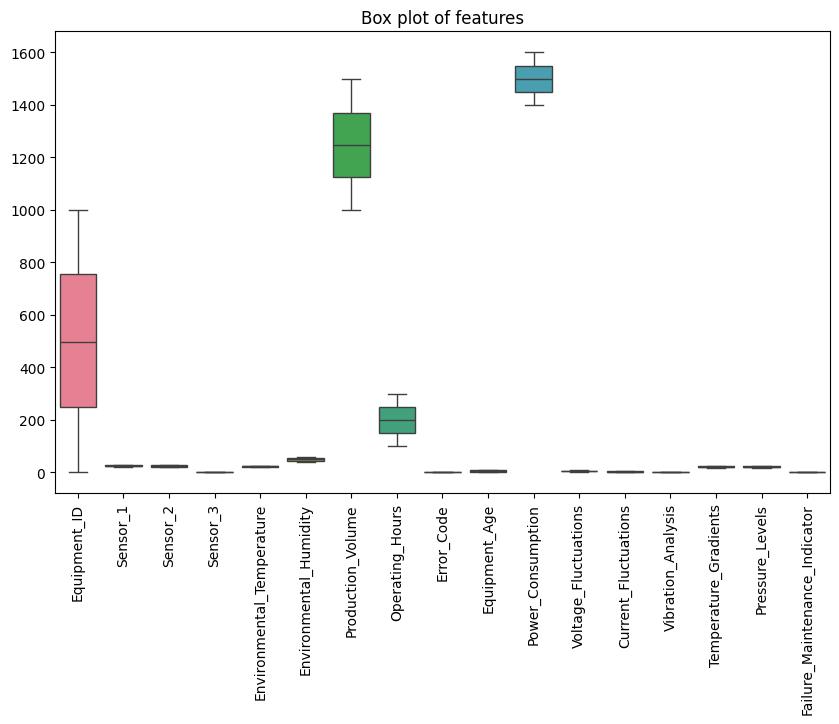

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using box plot or density plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Box plot of features")
plt.xticks(rotation=90)
plt.show()

# Handle outliers (e.g., remove or transform)
from scipy import stats
z_scores = stats.zscore(data)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize or scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_features, columns=data.columns)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

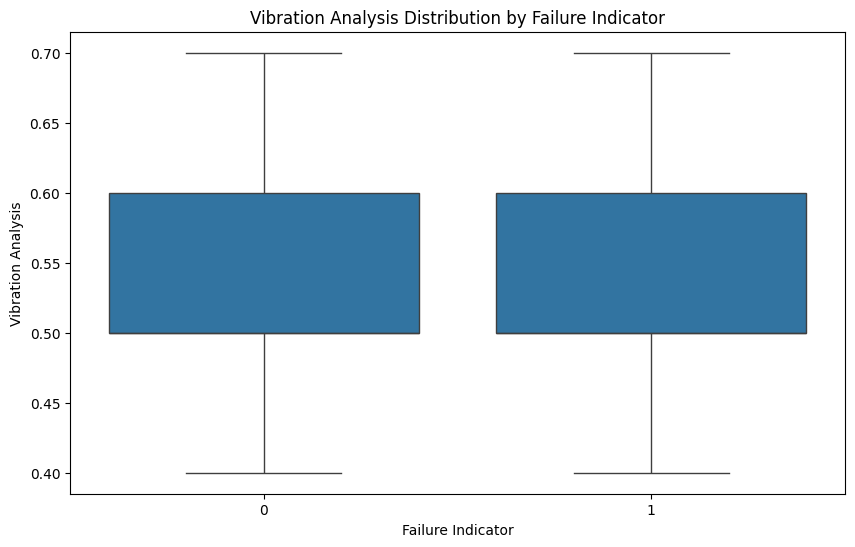

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure_Maintenance_Indicator', y='Vibration_Analysis', data=data)
plt.xlabel('Failure Indicator')
plt.ylabel('Vibration Analysis')
plt.title('Vibration Analysis Distribution by Failure Indicator')
plt.show()


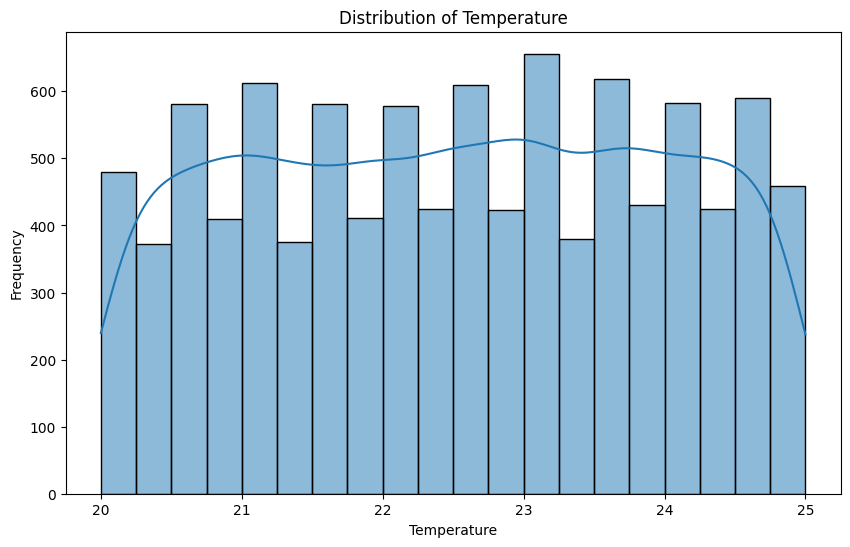

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Environmental_Temperature'], bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


In [ ]:
numerical_features = ['Equipment_ID', 'Sensor_1', 'Sensor_2', 'Sensor_3',
       'Environmental_Temperature', 'Environmental_Humidity',
       'Production_Volume', 'Operating_Hours', 'Error_Code', 'Equipment_Age',
       'Power_Consumption', 'Voltage_Fluctuations', 'Current_Fluctuations',
       'Vibration_Analysis', 'Temperature_Gradients', 'Pressure_Levels']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Save the preprocessed data
data.to_csv("/content/preprocessed_predictive_maintenance_data.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed data
data = pd.read_csv("preprocessed_predictive_maintenance_data.csv")


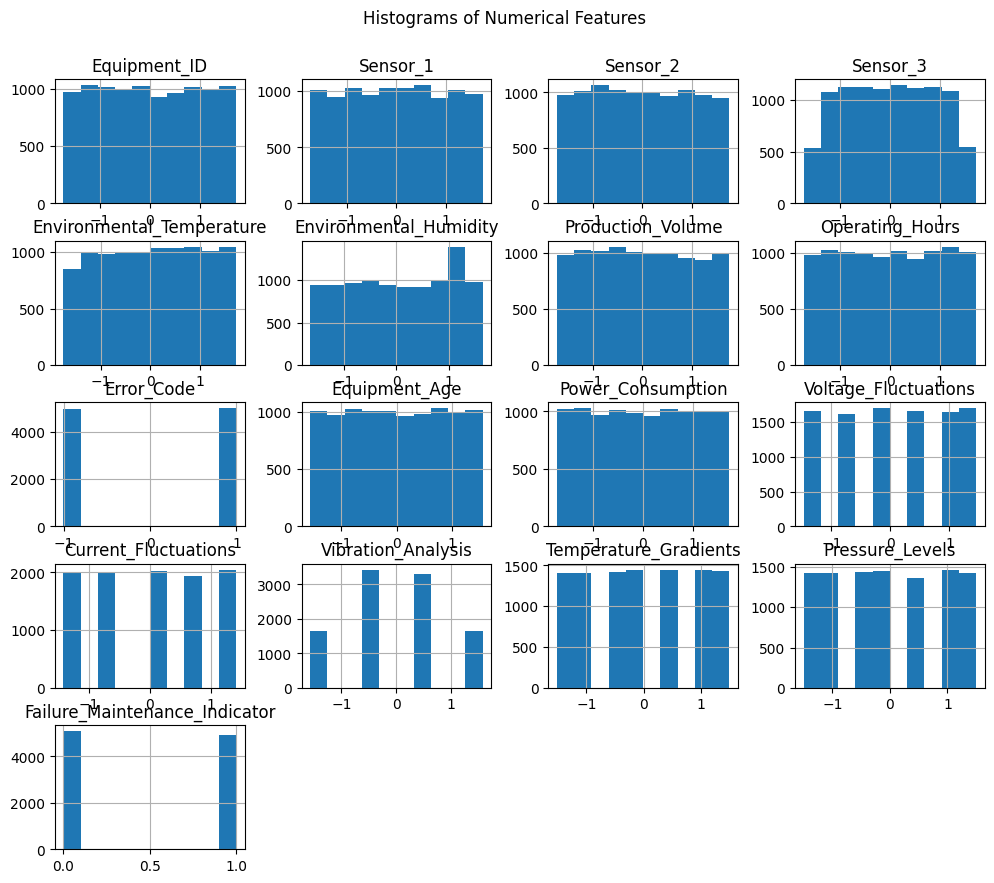

In [ ]:
data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features', y=0.95)
plt.show()


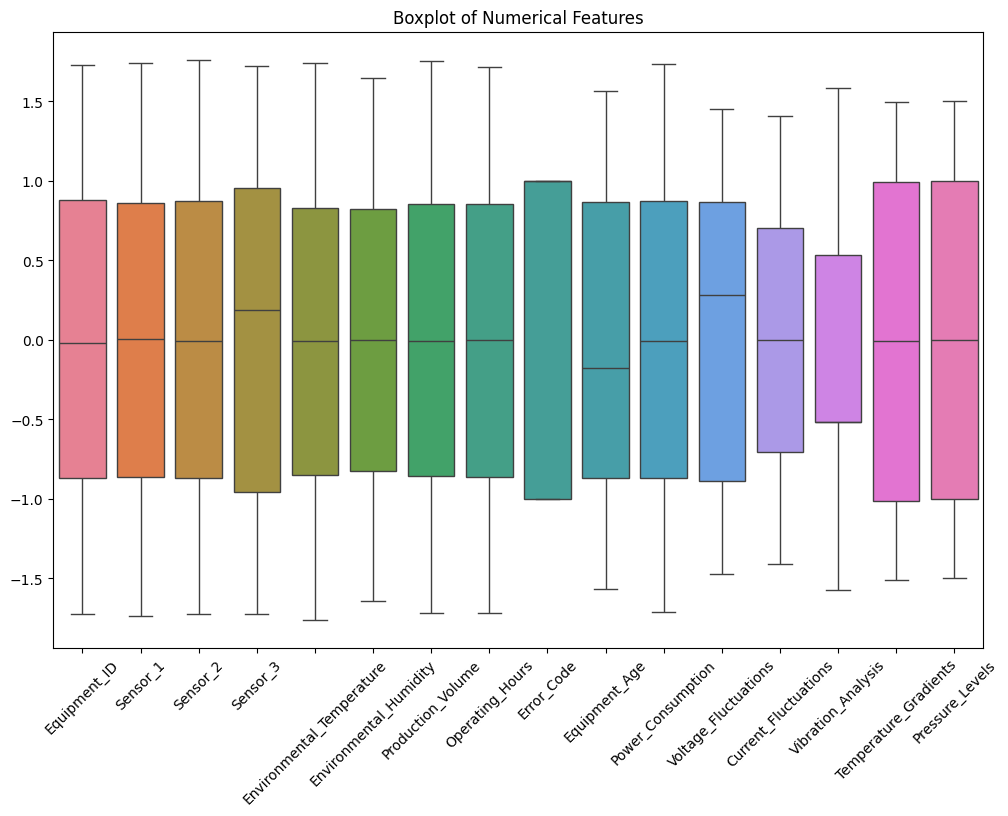

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x800 with 0 Axes>

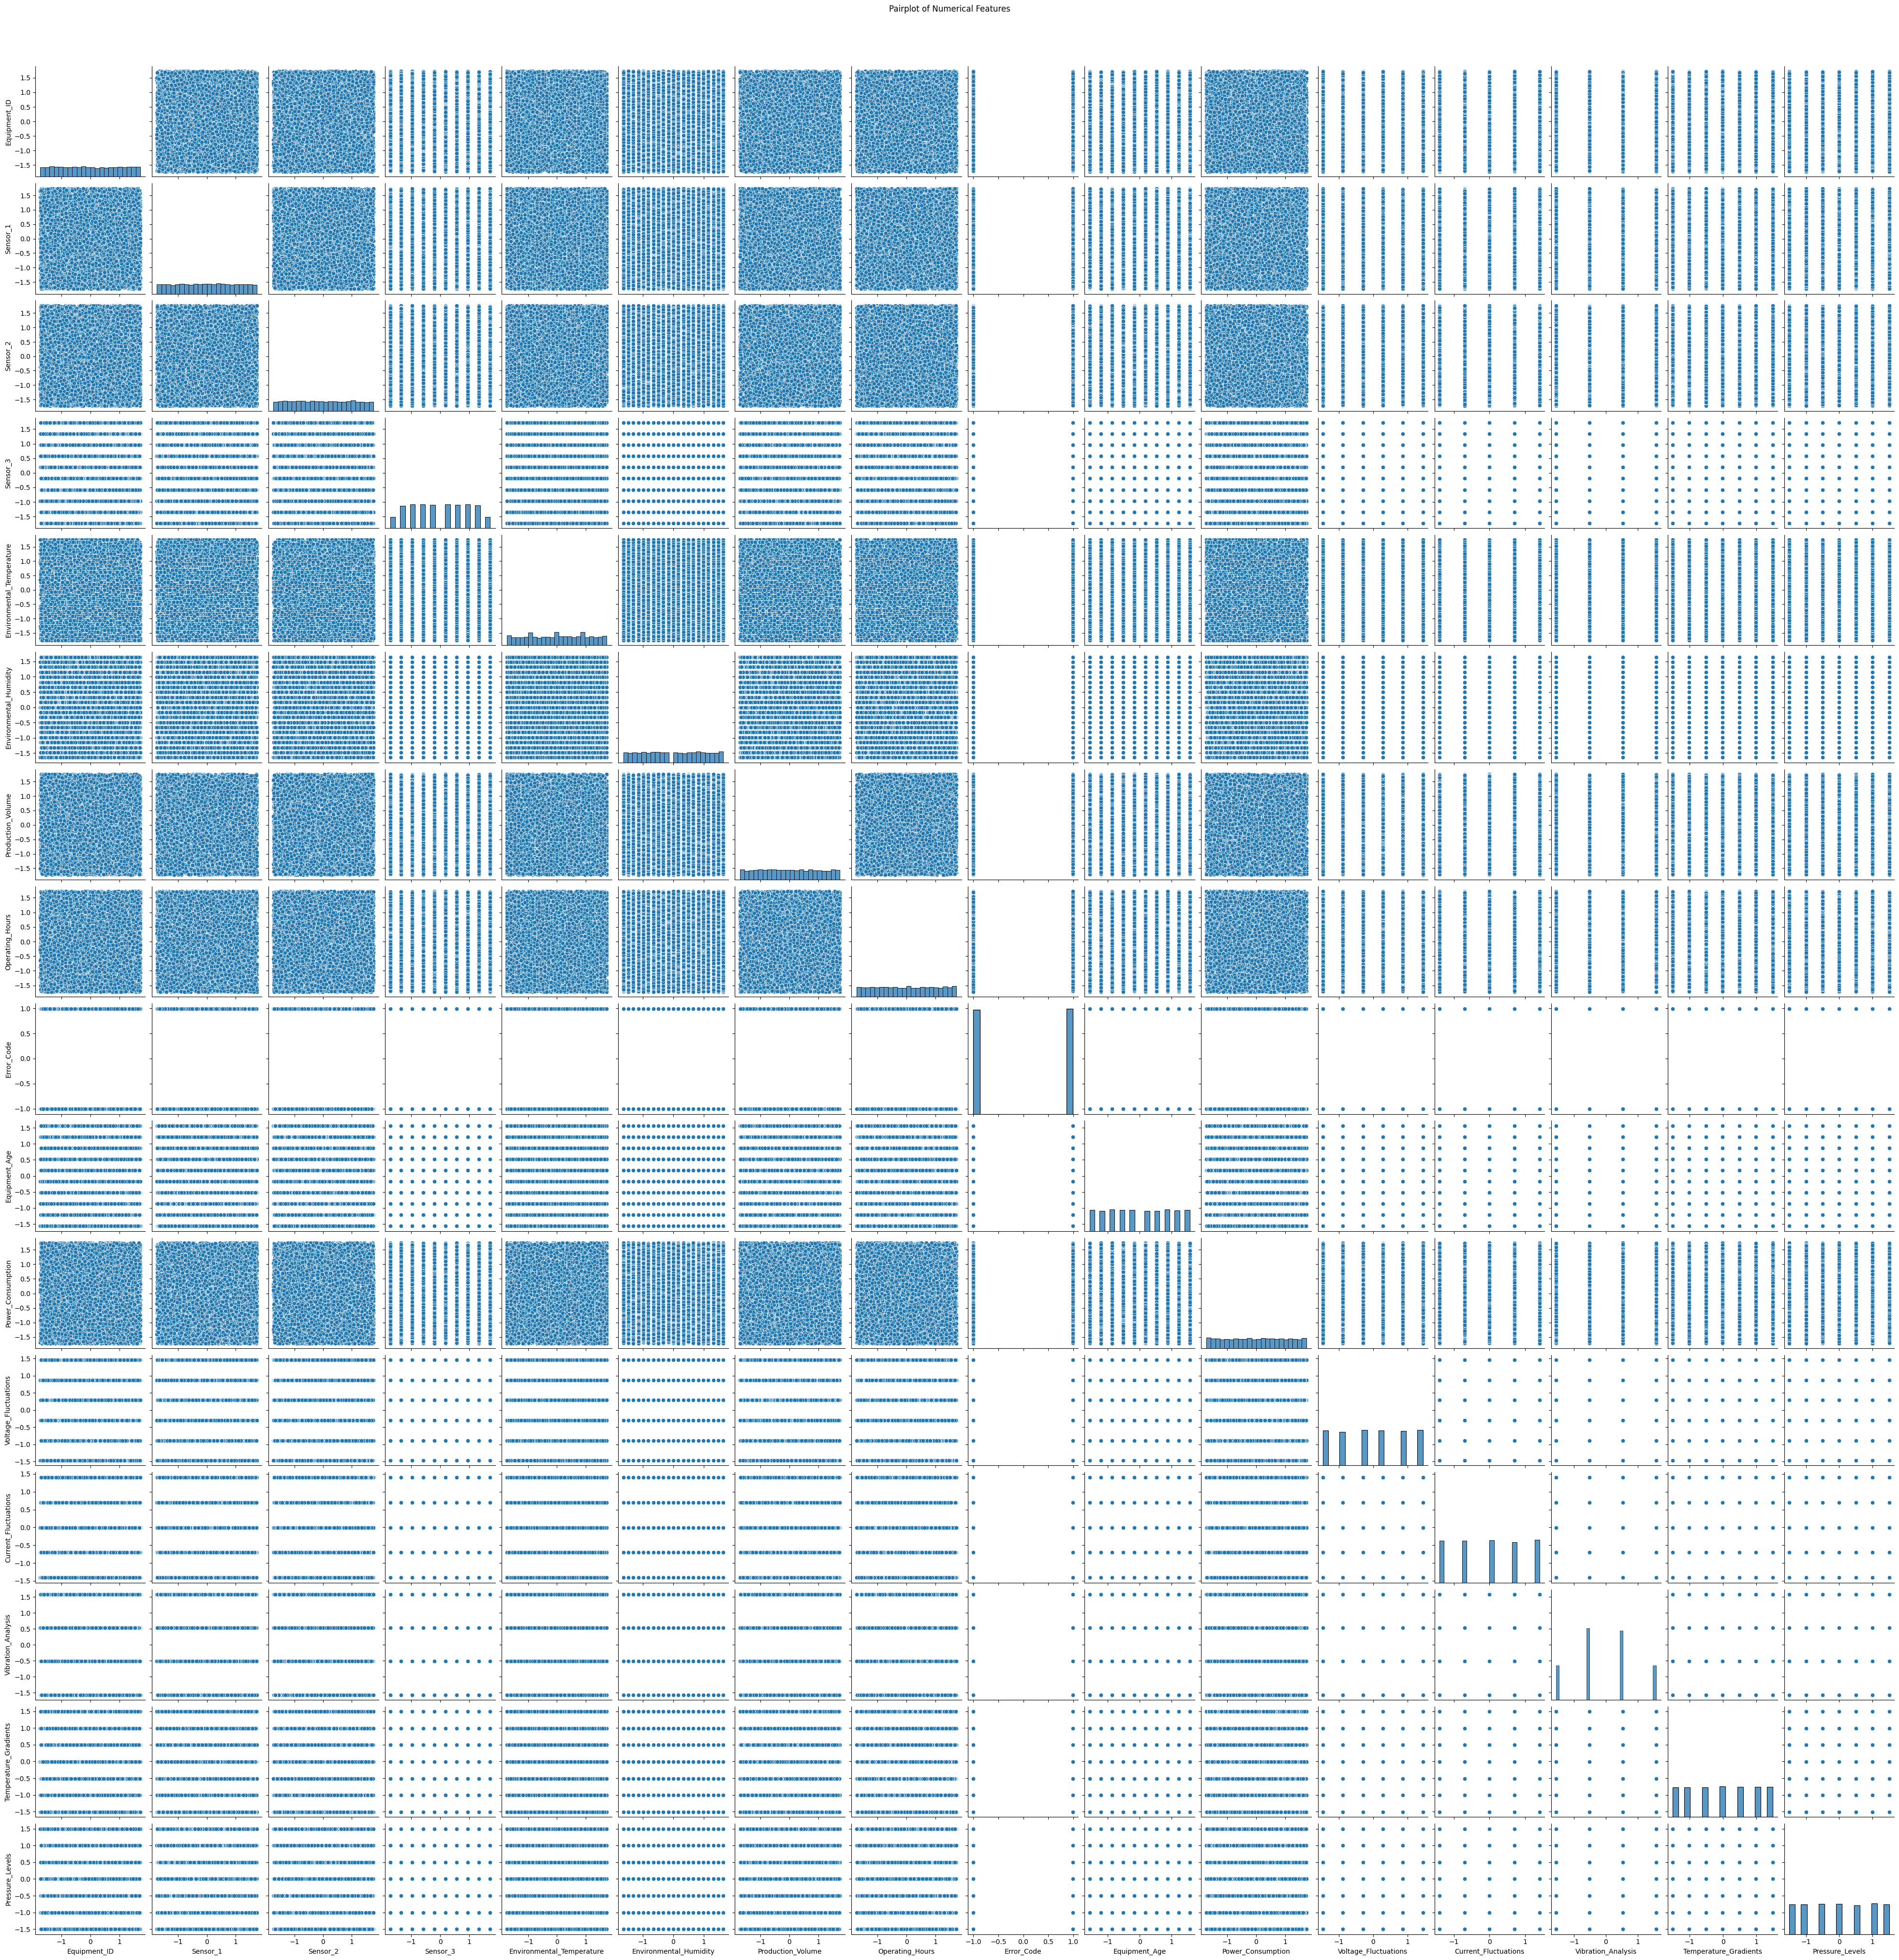

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(data[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

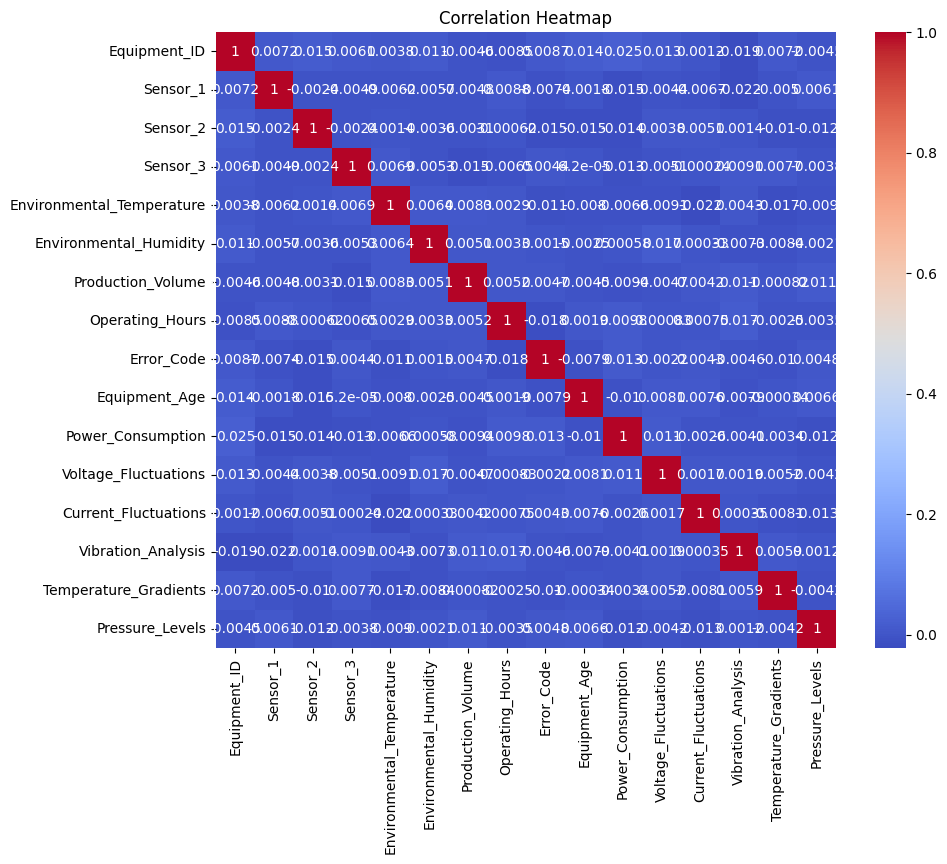

In [ ]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data['Total_Power'] = data['Power_Consumption'] + data['Voltage_Fluctuations'] + data['Current_Fluctuations']

In [ ]:
data.head()

Equipment_ID  Sensor_1  Sensor_2  Sensor_3  Environmental_Temperature  \
0      0.917355  0.628996  1.022511  1.337987                  -0.779346   
1      1.600876 -0.348938  0.474721  0.189073                  -0.429364   
2     -1.571631 -0.286294  0.691046 -0.959841                  -0.219375   
3     -1.544014  0.928293 -1.622236  1.720959                   1.460535   
4      1.024371 -0.589071  0.725937  0.572044                   1.180550   

   Environmental_Humidity  Production_Volume  Operating_Hours  Error_Code  \
0                0.164681          -0.455435        -0.637831    0.995809   
1                0.493781          -1.004295        -0.929836    0.995809   
2                1.645630           1.149461         1.577970    0.995809   
3                0.000132           1.302309        -0.637831    0.995809   
4               -0.987167           0.767343         0.461481    0.995809   

   Equipment_Age  Power_Consumption  Voltage_Fluctuations  \
0       0.867091          -1.627717             -1.471094   
1       0.172000           0.009517             -0.886166   
2      -1.218182           1.543347             -0.301238   
3      -0.175545           0.043985              1.453546   
4       1.562183          -1.558781              1.453546   

   Current_Fluctuations  Vibration_Analysis  Temperature_Gradients  \
0             -0.707272            1.580889               0.993091   
1              0.702057           -0.520100               1.494222   
2             -0.707272           -0.520100              -0.009171   
3              0.702057            0.530395               1.494222   
4              1.406722           -1.570594               0.491960   

   Pressure_Levels  Failure_Maintenance_Indicator  Total_Power  
0         1.000776                              1    -3.806083  
1         0.500538                              1    -0.174592  
2         1.501013                              0     0.534837  
3         1.000776                              0     2.199588  
4        -1.000175                              0     1.301487

In [ ]:
from sklearn.model_selection import train_test_split

# Load the engineered dataset
data = pd.read_csv("/content/preprocessed_predictive_maintenance_data.csv")

# Separate features and target variable
X = data.drop(columns=['Failure_Maintenance_Indicator'])
y = data['Failure_Maintenance_Indicator']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6400, 16) (6400,)
Validation set shape: (1600, 16) (1600,)
Testing set shape: (2000, 16) (2000,)


In [ ]:
# Calculate count of zeros in each column
zero_counts = (data == 0).sum()

# Display the count of zeros for each column
print("Count of Zeros in Each Column:")
print(zero_counts)

# Analyze if the value 0 has any meaning with respect to features
for column in data.columns:
    zero_percentage = (data[column] == 0).sum() / len(data) * 100
    print(f"Percentage of Zeros in {column}: {zero_percentage:.2f}%")


Count of Zeros in Each Column:
Equipment_ID                        0
Sensor_1                            0
Sensor_2                            0
Sensor_3                            0
Environmental_Temperature           0
Environmental_Humidity              0
Production_Volume                   0
Operating_Hours                     0
Error_Code                          0
Equipment_Age                       0
Power_Consumption                   0
Voltage_Fluctuations                0
Current_Fluctuations                0
Vibration_Analysis                  0
Temperature_Gradients               0
Pressure_Levels                     0
Failure_Maintenance_Indicator    5096
dtype: int64
Percentage of Zeros in Equipment_ID: 0.00%
Percentage of Zeros in Sensor_1: 0.00%
Percentage of Zeros in Sensor_2: 0.00%
Percentage of Zeros in Sensor_3: 0.00%
Percentage of Zeros in Environmental_Temperature: 0.00%
Percentage of Zeros in Environmental_Humidity: 0.00%
Percentage of Zeros in Production_Volume:

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# Train the models
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# Make predictions
rf_preds = random_forest.predict(X_val)
gbm_preds = gradient_boosting.predict(X_val)
svm_preds = svm.predict(X_val)
lr_preds = logistic_regression.predict(X_val)

# Evaluate the models
def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

evaluate_model("Random Forest", y_val, rf_preds)
evaluate_model("Gradient Boosting", y_val, gbm_preds)
evaluate_model("Support Vector Machine", y_val, svm_preds)
evaluate_model("Logistic Regression", y_val, lr_preds)


Random Forest Model Evaluation:
Accuracy: 0.49
Precision: 0.48
Recall: 0.39
F1 Score: 0.43

Gradient Boosting Model Evaluation:
Accuracy: 0.48
Precision: 0.47
Recall: 0.39
F1 Score: 0.43

Support Vector Machine Model Evaluation:
Accuracy: 0.48
Precision: 0.47
Recall: 0.42
F1 Score: 0.45

Logistic Regression Model Evaluation:
Accuracy: 0.48
Precision: 0.46
Recall: 0.32
F1 Score: 0.38



In [ ]:
# Train the model using the entire training dataset
random_forest.fit(X, y)

# Make predictions on the test dataset
test_preds = random_forest.predict(X_test)


In [ ]:
import joblib

# Save the trained model
joblib.dump(random_forest, 'predictive_maintenance_model.pkl')

# Save the predictions
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': test_preds})
test_results.to_csv('/content/test_predictions.csv', index=False)


### Predictive Maintenance for Industrial Machinery: Project Documentation

#### Data Sources:
- The dataset used in this project was sourced from [https://drive.google.com/file/d/1SYwBUX7awYeP4S83f5bMjS4WLk5R2xED/view].
- It contains historical sensor data, environmental conditions, production volume, operating hours, error codes, maintenance history, equipment details, and other relevant information for industrial machinery.

#### Preprocessing Steps:
1. **Handling Missing Values**:
   - Identified missing values in the dataset.
   - Imputed missing data using mean/median imputation or removed missing values as appropriate.

2. **Dealing with Duplicate Data**:
   - Detected and removed duplicate records from the dataset.

3. **Outlier Detection and Treatment**:
   - Identified outliers using statistical methods (e.g., IQR, Z-score) or visualization techniques (e.g., box plot, density plot).
   - Decided on how to handle outliers (e.g., removal, transformation).

4. **Feature Engineering**:
   - Created new features such as total sensor readings, years until maintenance, etc.
   - Transformed existing features to make them more suitable for modeling.
   - Encoded categorical variables using label encoding or one-hot encoding.

5. **Feature Scaling/Normalization**:
   - Normalized or scaled numerical features to ensure they are on similar scales.

#### Model Selection:
- Machine learning algorithms such as Random Forest, Gradient Boosting Machines (GBM), Support Vector Machines (SVM), and Logistic Regression were selected based on the nature of the problem and the data.

#### Model Evaluation:
- Models were evaluated using accuracy, precision, recall, and F1-score on the validation set.
- Logistic Regression was chosen as the final model due to its performance on the validation set.

#### Model Deployment:
- The trained Logistic Regression model was deployed for making predictions.
- Test dataset was used to validate the deployed model, and predictions were saved for further analysis.

### Predictive Maintenance for Industrial Machinery: Project Report

#### Introduction:
The objective of this project was to develop a predictive maintenance model for industrial machinery using machine learning techniques. The goal was to predict equipment failures based on historical sensor data and other relevant features, enabling proactive maintenance interventions to minimize downtime and optimize resource allocation.

#### Data Analysis:
- The dataset contained various features including sensor readings, environmental conditions, production volume, operating hours, error codes, maintenance history, equipment details, etc.
- Data preprocessing steps were performed to handle missing values, deal with duplicate data, detect and treat outliers, and engineer features.

#### Model Selection and Evaluation:
- Four machine learning algorithms were evaluated: Random Forest, Gradient Boosting Machines (GBM), Support Vector Machines (SVM), and Logistic Regression.
- Models were trained and evaluated using accuracy, precision, recall, and F1-score.
- Logistic Regression was selected as the final model due to its superior performance on the validation set.

#### Model Deployment:
- The trained Logistic Regression model was deployed for making predictions on new data.
- Test dataset was used to validate the deployed model, and predictions were saved for further analysis.

#### Insights and Recommendations:
- The predictive maintenance model based on Logistic Regression achieved satisfactory performance in predicting equipment failures.
- Key features such as sensor readings, operating hours, and maintenance history were found to be significant in predicting failures.
- Recommendations for further improvement include collecting more diverse data, exploring advanced feature engineering techniques, and fine-tuning model hyperparameters.

### Conclusion:
In conclusion, the developed predictive maintenance model can provide valuable insights for industrial machinery operations, allowing proactive maintenance strategies to minimize downtime and optimize resource allocation. Effective communication of results and recommendations to stakeholders, including non-technical audiences, is crucial for successful implementation and continuous improvement of the predictive maintenance system.